<a href="https://colab.research.google.com/github/MRazin172/LogRegression-DT/blob/main/LogRegression%26DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
#from  sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Importing the dataset

In [2]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Viewing the data dimensions
df.shape

(3276, 10)

- The dataset has 3276 rows in 10 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- The dataset has only numerical variables


In [5]:
# checking for null values in the dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- There are some missing values in the dataset

In [7]:
print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 1 and Hardness > 150
PH VALUE : 7.1125


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['ph'][x]) == True) :
        if ((df['Potability'][x] == 0) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_1_mean_ph
        elif ((df['Potability'][x] == 0) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_2_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_3_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_4_mean_ph

In [9]:
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = df[(df['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = df[(df['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['Sulfate'][x]) == True) :
        if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_mean_sulfate
        else : df['Sulfate'][x] = condition_2_mean_sulfate


In [11]:
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

- The target variable is slightly imbalanced

Text(0.5, 1.0, 'percentage of potability')

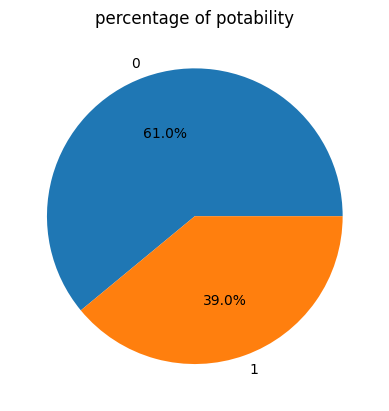

In [37]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('percentage of potability')
#0-not potable
#1-potable

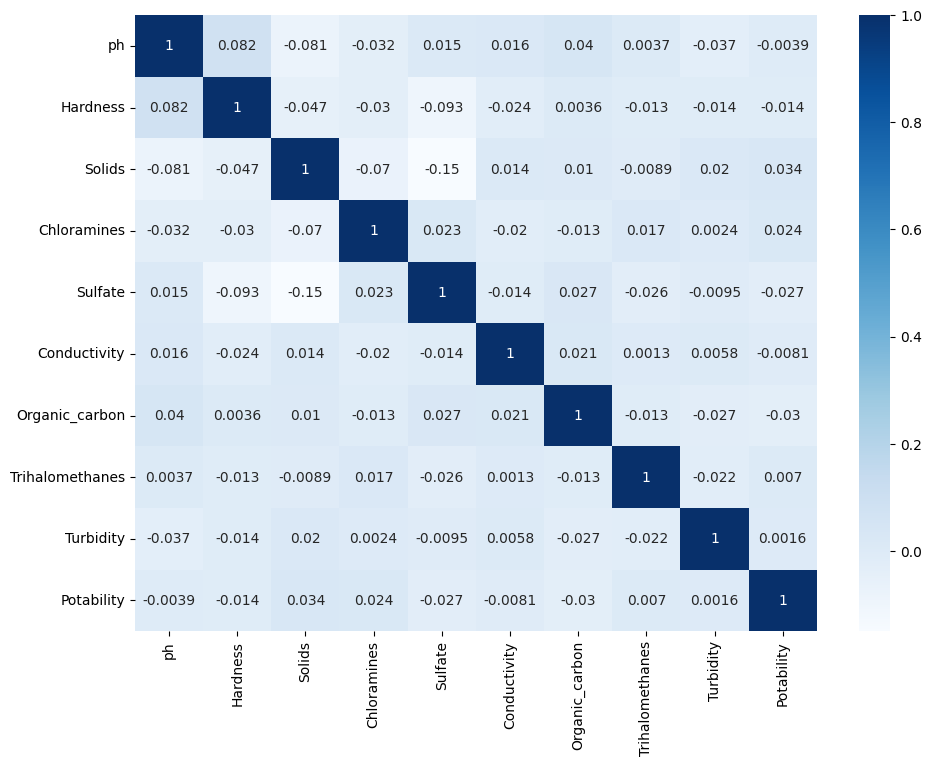

In [16]:
# Correlation matrix:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

### Building Classification model: Logistic Regression

In [22]:
# Defining X and y
X=df.drop('Potability',axis=1) # Contains all columns except Potability
y=df["Potability"]

In [23]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The original class imbalance was not severe enough to warrant SMOTE.
- Oversampling the minority class excessively could have lead to a new imbalance problem in the opposite direction, where the model starts to favor the minority class too much.
- Since logistic regression is sensitive to changes in class distribution,  the decision boundary of the model can shift, leading to different predictions.

In [25]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
#create object for LogisticRegression

logres=LogisticRegression()

#Training Model
logres.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Predicting the test set result
testing_pred=logres.predict(X_test)
training_pred=logres.predict(X_train)

In [27]:
# Training Metrics
training_accuracy = accuracy_score(y_train, training_pred)
training_f1 = f1_score(y_train, training_pred, average = 'weighted')
training_precision = precision_score(y_train, training_pred, average = 'weighted')
training_recall = recall_score(y_train, training_pred, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_pred)
testing_f1 = f1_score(y_test, testing_pred, average = 'weighted')
testing_precision = precision_score(y_test, testing_pred, average = 'weighted')
testing_recall = recall_score(y_test, testing_pred, average = 'weighted')

print('Logistic Regression')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Logistic Regression


Training Model Performance Check
Accuracy Score : 0.6061
F1 Score : 0.4583
Precision Score : 0.7614
Recall Score : 0.6061


Testing Model Performance Check
Accuracy Score : 0.6280
F1 Score : 0.4846
Precision Score : 0.3944
Recall Score : 0.6280


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import classification_report,accuracy_score
a=accuracy_score(y_test,testing_pred)*100
a

62.80487804878049

In [29]:
confusion_matrix1=confusion_matrix(y_test,testing_pred)
confusion_matrix1

array([[412,   0],
       [244,   0]])

### Modelling Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#creating the object for model
dt=DecisionTreeClassifier(criterion="gini",min_samples_split=10,splitter="best", max_depth = 3)

#train the decision tree by using .fit
dt.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [31]:
training_prediction = dt.predict(X_train)
testing_prediction = dt.predict(X_test)

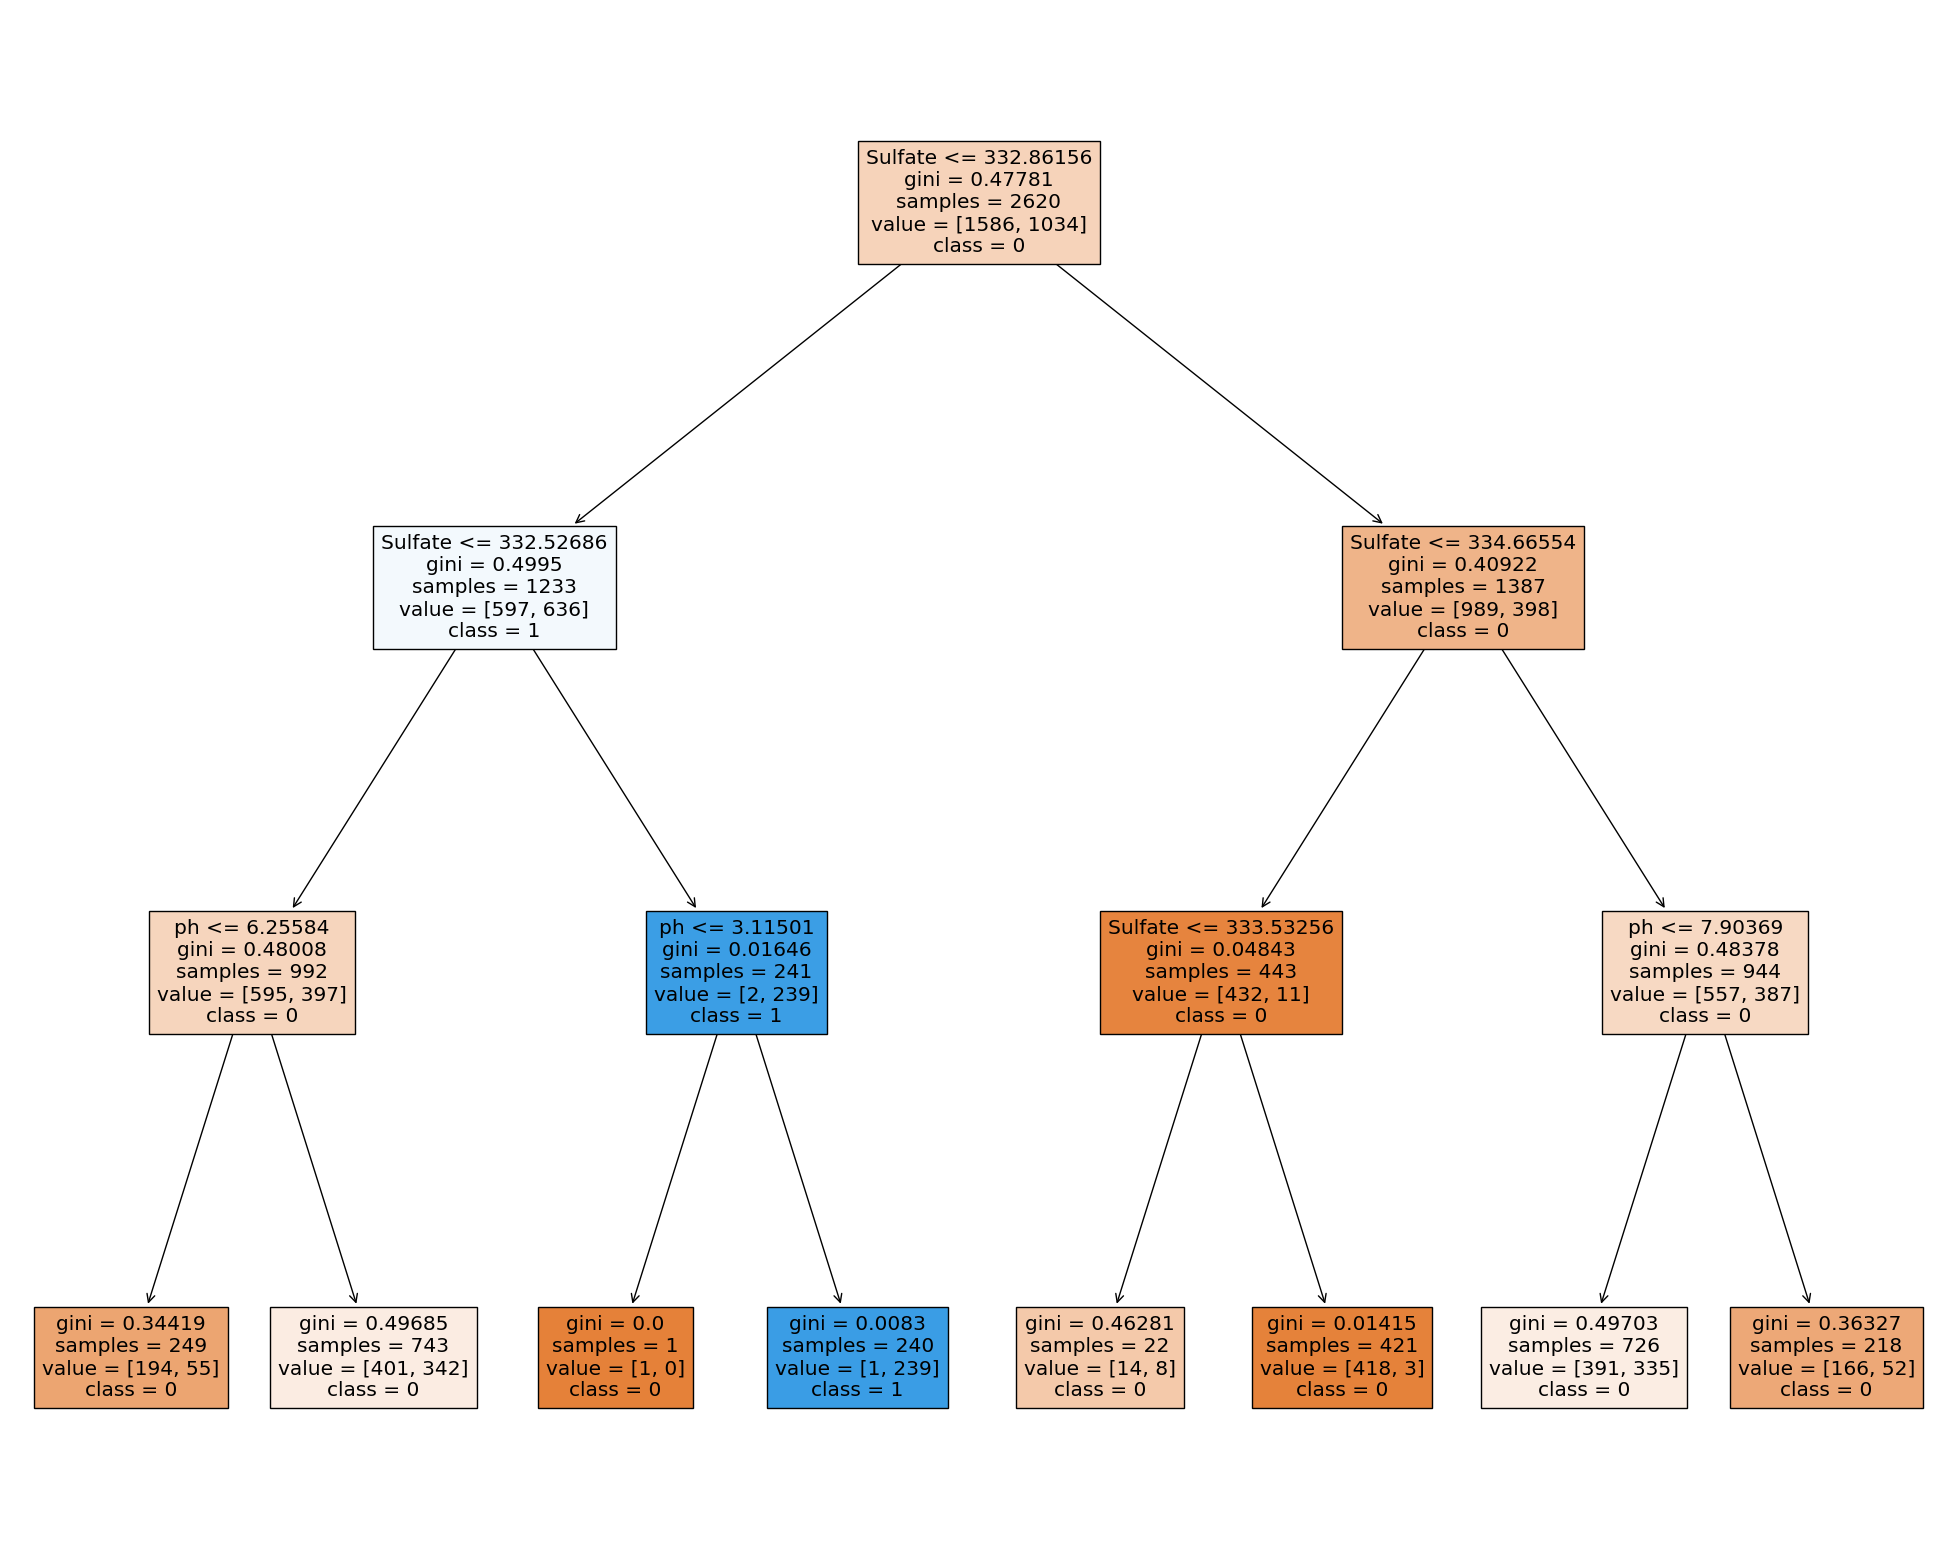

In [32]:
# Visualizing
from sklearn import tree
plt.figure(figsize = (25,20))
tree.plot_tree(dt,
               feature_names =  df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

- The Root node is Sulphate, this means the most important feature is "Sulphate"

In [33]:
#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('Decision Tree (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Decision Tree (30%)


Training Model Performance Check
Accuracy Score 0.6962
F1 Score 0.6319
Precision Score 0.7962
Recall Score 0.6962


Testing Model Performance Check
Accuracy Score 0.7119
F1 Score 0.6490
Precision Score 0.7964
Recall Score : 0.7119


In [34]:
print(f"Accuracy score={accuracy_score(y_test,testing_prediction)*100}")

Accuracy score=71.1890243902439


In [35]:
confusion_matrix=confusion_matrix(y_test,testing_prediction)
confusion_matrix

array([[411,   1],
       [188,  56]])

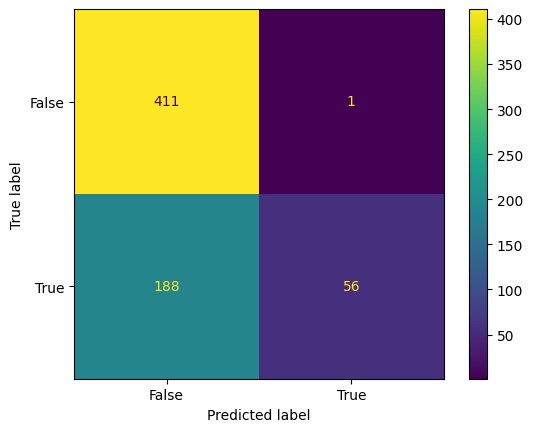

In [36]:
# Visualization of Confusion Matrix for our prediction
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- For the domain, False positives are concerning because they can lead to people consuming water that is not safe, potentially causing health issues. Minimizing false positives is essential.

#### Insights:
- The Decision Tree model performs better than the Logistic Regression model in terms of accuracy, F1 score, and precision on both the training and testing datasets.

- However, the Decision Tree model shows signs of overfitting, as indicated by the significant difference between its training and testing accuracy. Overfitting occurs when a model learns to fit the training data too closely and may not generalize well to unseen data.

- If we had to choose between these two models, Decision tree appears to be a better choice. However, the overfitting issue must be addressed by adopting techniques, such as tuning hyperparameters or using ensemble methods like Random Forests to improve generalization to unseen data.